# Python Fundamentals: Introduction to Pandas

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Load .csv files into a Pandas `DataFrame`.
* Understand that Pandas can be used for exploratory analysis.
* Learn how to select columns and rows in a Pandas `DataFrame`.
</div>


### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Sections
1. [Data Frames: Spreadsheets in Python](#df)
2. [Selecting Columns](#columns)
3. [Selecting Rows](#rows)
4. [Demo: Grouping and Plotting Data Frames](#group)

<a id='df'></a>

# Data Frames: Spreadsheets in Python

**Tabular data** is everywhere. Think of an Excel sheet: each column corresponds to a different feature of each datapoint, while rows correspond to different samples.

In scientific programming, tabular data is often called a **data frame**. In Python, the `pandas` package contains an object called `DataFrame` that implements this data structure.

## Importing Packages

A **package** is a collection of code that someone else wrote and put in a sharable format. Usually it's designed to add specific functionalities to Python. The package we will use in this notebook is called Pandas.

Before we can use a package like Pandas, we have to **import** it into the current session.
Importing is done with the `import` keyword. We simply run `import [PACKAGE_NAME]`, and everything inside the package becomes available to use.

For many packages, like `pandas`, we use an **alias**, or nickname, when importing them. This is just done to save some typing when we refer to the package in our code.

Let's import the `pandas` module, and add the alias `pd`.

In [2]:
import pandas as pd

## 🥊 Challenge 1: From Dictionary to Data Frame

You can easily build a data frame from a dictionary. However, the following code gives an error. Why does it have an error? 

💡 **Tip:** Google the line at the bottom of the error message if you need help!

In [3]:
titles = ['AITA for eating a random lunch in the communal fridge?',
          'AITA for leaving just a little bit of OJ left in the jug?',
          "AITA for not wanting to pay for my friend's meal?"]
scores = [242, 921, 492]
num_comments = [52, 109, 42]

# Creating a dict from lists
aita_dict = {'title': titles,
             'score': scores,
             'num_comments': num_comments}

pd.DataFrame(aita_dict)

,title,score,num_comments
0,AITA for eating a random lunch in the communal...,242,52
1,AITA for leaving just a little bit of OJ left ...,921,109
2,AITA for not wanting to pay for my friend's meal?,492,42


## Reading CSV Files

In the cell below, we use the `read_csv()` method, which takes a string as its main argument. This string consists of the file path pointing to the file.

* `../` means "go up one level from where this notebook is" -- which is the "lessons" folder.
* `data/` means 'go into a folder called "data".
* `aita_top_submissions.csv` is the file name we are accessing within that "data" folder.

In [4]:
df = pd.read_csv('data/aita_top_submissions.csv')

The `.head()` method will show the first five rows of a Data Frame by default. 

💡 **Tip**: Put an integer in between the parentheses to specify a different number of rows. 

In [5]:
df.head()

,idstr,created,author,title,selftext,score,num_comments,nsfw,flair_text
0,t3_72kg2a,2017-09-26 13:48:09,Ritsku,AITA for breaking up with my girlfriend becaus...,My girlfriend recently went to the beach with ...,679.0,434.0,0.0,no a--holes here
1,t3_94kvhi,2018-08-04 17:34:55,hhhhhhffff678,AITA for banning smoking in my house and telli...,My parents smoke like chimneys. I used to as w...,832.0,357.0,0.0,asshole
2,t3_951az2,2018-08-06 13:31:39,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,335.0,0.0,Shitpost
3,t3_978ioa,2018-08-14 13:50:41,Pauly104,AITA for eating steak in front of my vegan GF?,"Yesterday night, me and my GF decided to go ou...",1011.0,380.0,0.0,not the a-hole
4,t3_99yo3c,2018-08-24 16:03:40,ThatSpencerGuy,AITA for not wanting to cook my mother-in-law ...,"My wife and I are vegetarians, much to my in-l...",349.0,360.0,0.0,not the a-hole


### More on .csv Files
As data scientists, we'll often be working with these **Comma Separated Values (.csv)** files. 

Comma separated values files are common because they are relatively small and look good in spreadsheet software. A comma separated values file is just a text file that contains data but that has commas (or other separators) to indicate column breaks.

As you see, `pandas` comes with a function [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
that makes it really easy to import .csv files.

Let's have a look at our .csv file in our browser!

<a id='columns'></a>

# Selecting Columns
Now that we have our `DataFrame`, we can select a single column by selecting the name of that column. This uses bracket notation (like we do when accessing lists).

Check it out:

In [6]:
df['author']

0                      Ritsku
1               hhhhhhffff678
2              creepatthepool
3                    Pauly104
4              ThatSpencerGuy
                 ...         
19995       ReluctantCosigner
19996    TiredNeedleandThread
19997       Ineedadvicepleaze
19998        Throwaway4773782
19999    Due-Understanding536
Name: author, Length: 20000, dtype: object

The data type of this column is a `Series`. It's like a list. You can index a `Series` object just like you can with a list!

In [7]:
aita_author = df['author']
aita_author[0]

'Ritsku'

## Using Methods on Columns

`DataFrame` objects come with their own methods, many of which operate on a single column of the DataFrame. 

For example, we can identify the number of unique values in each column by using the `nunique()` method:

In [8]:
df['author'].nunique()

19404

Usually, a package provides **documentation** that explains all of its functionalities. Let's have a look at the documentation for a method called `value_counts()` [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). 

🔔 **Question**: What does `value_counts()` do in the code below?

In [9]:
df['flair_text'].value_counts()

flair_text
Not the A-hole                11418
Asshole                        3667
Everyone Sucks                  717
No A-holes here                 628
UPDATE                          195
Not enough info                 161
Update                           16
META                             16
Open Forum                       16
not the a-hole                    8
asshole                           4
everyone sucks                    3
Probably Fake                     3
Fake Story                        2
Fake                              2
NEWS                              1
IMPORTANT                         1
Pobably Fake                      1
OP Banned - Rule 3                1
Judgment denied.                  1
Eat Stew Homie                    1
I crave validation!               1
Quality Shitpost                  1
no a--holes here                  1
Probably a Fake Story             1
Happy New Year!                   1
Fake story/Everyone Sucks         1
probably fake    

## 🥊  <span> Challenge 2: Putting Methods in Order</span>

In the following code we want to to find the top-3 most frequently occurring flairs in our data. Put the following code fragments in the right order to get this information!

In [11]:
df.head(3)
df.value_counts()
df['flair_text']

0        no a--holes here
1                 asshole
2                Shitpost
3          not the a-hole
4          not the a-hole
               ...       
19995                 NaN
19996                 NaN
19997                 NaN
19998                 NaN
19999                 NaN
Name: flair_text, Length: 20000, dtype: object

## Attributes 

Packages like Pandas don't only come with methods, but also with so-called **attributes**.

Attributes are like variables: they give you more information about the data that you have. Methods are like functions: they allow you to do something with data.

For instance, we can easily check the column names of our data frame using the `columns` **attribute**.

In [12]:
df.columns

Index(['idstr', 'created', 'author', 'title', 'selftext', 'score',
       'num_comments', 'nsfw', 'flair_text'],
      dtype='object')

🔔 **Question**: Here's another popular attribute: `shape`. What do you think it does?

In [13]:
df.shape

(20000, 9)

## Jupyter Autocomplete

Jupyter Notebooks allow for tab completion, just like many text editors. If you begin typing the name of something (such as a variable) that already exists, you can simply hit **Tab** and Jupyter will autocomplete it for you. If there is more than one possibility, it will show them to you and you can choose from there. 

🔔 **Question:** Below we are selecting a column in our `DataFrame`. See what happens when you hit `TAB`! What are you seeing?

In [15]:
# YOUR CODE HERE

df['flair_text'].backfill()

/var/folders/0l/p7x7d7755vq4wc8qty73kcy40000gn/T/ipykernel_63448/3376546217.py:3: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  df['flair_text'].backfill()


0        no a--holes here
1                 asshole
2                Shitpost
3          not the a-hole
4          not the a-hole
               ...       
19995                 NaN
19996                 NaN
19997                 NaN
19998                 NaN
19999                 NaN
Name: flair_text, Length: 20000, dtype: object

<a id='rows'></a>

# Selecting Rows

What if we wanted to get some rows in our dataset based on some condition? For example, what if we just wanted a select only the rows for which the flair is "Not the A-hole"? Or only posts that have a certain number of comments?

We can use so-called **value comparison operators** for this. For instance, to get only the rows that have a specific flair, we can use `==`.

In [16]:
df['flair_text'] == 'Not the A-hole'

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: flair_text, Length: 20000, dtype: bool

💡 **Tip**: Fancy terminology alert: the above Series is called a **Boolean mask**. It's like a list of True/False labels that we can use to filter our Data Frame for a certain condition!

Here, we create a subset of our Data Frame with the fancy Boolean mask we just created. 

In [17]:
# Getting only the data points with this flair
df[df['flair_text'] == 'Not the A-hole']

,idstr,created,author,title,selftext,score,num_comments,nsfw,flair_text
19,t3_9o4i1z,2018-10-14 17:20:36,samfletchxo,AITA for asking my boyfriend’s parents to give...,My boyfriend and I recently bought our first h...,10133.0,1117.0,0.0,Not the A-hole
20,t3_9oczd2,2018-10-15 14:07:56,ICUMTARANTULAS,AITA for having sex with my fiancé?,So I live on a second floor of an apartment co...,9354.0,1014.0,0.0,Not the A-hole
21,t3_9p7m8t,2018-10-18 09:17:24,Maddisonjkk,AITA For yelling at my housemates girlfriend b...,"After a big night out my housemate, his girlfr...",3854.0,653.0,0.0,Not the A-hole
23,t3_9py7hb,2018-10-20 22:00:07,trapped_underrice,AITA for eating after an old lady told me to s...,So every day on my way to the gym I eat a bag ...,4791.0,479.0,0.0,Not the A-hole
24,t3_9q9kea,2018-10-22 02:28:58,Lonetraveler87,AITA for getting annoyed at a couple for bring...,"This couple decided to bring their son, I assu...",14210.0,522.0,0.0,Not the A-hole
...,...,...,...,...,...,...,...,...,...
19982,t3_rh2s75,2021-12-15 16:20:09,-stalker-aita,AITA for reporting a stalker?,Adding that my friend lives in a house that th...,4977.0,401.0,0.0,Not the A-hole
19985,t3_rh4h3r,2021-12-15 17:33:14,mural312,AITA for refusing to paint a new mural in our ...,"When we first got married, I spent months pain...",6701.0,816.0,0.0,Not the A-hole
19987,t3_rh7b72,2021-12-15 19:34:38,rrraaaqq,AITA for having the girl my brother got pregna...,I 23f have a brother 18m who I love with all m...,7742.0,767.0,0.0,Not the A-hole
19988,t3_rh7cru,2021-12-15 19:36:37,ThrowRAwannaknow_,AITA for telling my son the truth about why my...,Her parents always looked down on me and I can...,20523.0,1577.0,0.0,Not the A-hole


Note that the output of this operation is a **new data frame**! We can assign it to a new variable so we can work with this subsetted data frame. Let's do it again:

In [18]:
# Creating a new data frame with data from 2018
nta_df = df[df['flair_text'] == 'Not the A-hole']
nta_df.head()

,idstr,created,author,title,selftext,score,num_comments,nsfw,flair_text
19,t3_9o4i1z,2018-10-14 17:20:36,samfletchxo,AITA for asking my boyfriend’s parents to give...,My boyfriend and I recently bought our first h...,10133.0,1117.0,0.0,Not the A-hole
20,t3_9oczd2,2018-10-15 14:07:56,ICUMTARANTULAS,AITA for having sex with my fiancé?,So I live on a second floor of an apartment co...,9354.0,1014.0,0.0,Not the A-hole
21,t3_9p7m8t,2018-10-18 09:17:24,Maddisonjkk,AITA For yelling at my housemates girlfriend b...,"After a big night out my housemate, his girlfr...",3854.0,653.0,0.0,Not the A-hole
23,t3_9py7hb,2018-10-20 22:00:07,trapped_underrice,AITA for eating after an old lady told me to s...,So every day on my way to the gym I eat a bag ...,4791.0,479.0,0.0,Not the A-hole
24,t3_9q9kea,2018-10-22 02:28:58,Lonetraveler87,AITA for getting annoyed at a couple for bring...,"This couple decided to bring their son, I assu...",14210.0,522.0,0.0,Not the A-hole


## 🥊 Challenge 3: Subsetting Data Frames

Besides `==` we can use [other operators](https://www.w3schools.com/python/gloss_python_comparison_operators.asp) to compare values. For instance:
- `<` less than
- `>` greater than

Fill in the code below to subset our data frame to include only posts with at least 500 comments (`num_comments`).

In [19]:
df.shape

(20000, 9)

In [22]:
# YOUR CODE HERE[
df[df['num_comments'] < 500]

,idstr,created,author,title,selftext,score,num_comments,nsfw,flair_text
0,t3_72kg2a,2017-09-26 13:48:09,Ritsku,AITA for breaking up with my girlfriend becaus...,My girlfriend recently went to the beach with ...,679.0,434.0,0.0,no a--holes here
1,t3_94kvhi,2018-08-04 17:34:55,hhhhhhffff678,AITA for banning smoking in my house and telli...,My parents smoke like chimneys. I used to as w...,832.0,357.0,0.0,asshole
2,t3_951az2,2018-08-06 13:31:39,creepatthepool,AITA? Creep wears skimpy bathing suit to pool,Hi guys. Throwaway for obv reasons.\n\nI'm a f...,23.0,335.0,0.0,Shitpost
3,t3_978ioa,2018-08-14 13:50:41,Pauly104,AITA for eating steak in front of my vegan GF?,"Yesterday night, me and my GF decided to go ou...",1011.0,380.0,0.0,not the a-hole
4,t3_99yo3c,2018-08-24 16:03:40,ThatSpencerGuy,AITA for not wanting to cook my mother-in-law ...,"My wife and I are vegetarians, much to my in-l...",349.0,360.0,0.0,not the a-hole
...,...,...,...,...,...,...,...,...,...
19986,t3_rh71mr,2021-12-15 19:23:29,Revolutionary-Bee601,AITA for taking my sons debit card,So this is what happened. My son who is 15 app...,11.0,363.0,0.0,NaN
19990,t3_rha8v7,2021-12-15 21:45:12,vacationflop,AITA for refusing to go on vacation with my bo...,My boyfriend Jeremy and I have been together a...,1810.0,377.0,0.0,NaN
19993,t3_rhetpz,2021-12-16 01:19:06,Monk3y-0,AITA for not letting my mom taste my sandwich,This isn’t nearly as heavy or as serious as mo...,251.0,427.0,0.0,NaN
19994,t3_rhiq1d,2021-12-16 04:41:56,ellinckn,"AITA for saying “try me, bitch” to my friend’s...","My friend (16F), my friend’s boyfriend (17M), ...",2280.0,458.0,0.0,NaN


## 🥊 Challenge 4: Subsetting and Calculating the Mean

Let's make use of subsetting to do some calculation! Calculate the **average score** for a flair of your choice. 

This means you will have to:
1. Subset the `flair_text` column using a Boolean mask.
2. Take the `score` column from that subset.
3. Apply a Pandas method to get the mean from that column.

You might not know how to get the mean of a column – yet! If that's the case, **use your search engine**.

1. Enter the name of the computer language or package, and your question (for instance: "Pandas calculate mean").
2. Read and compare the results you find.
3. Try 'em out!

In [ ]:
# YOUR CODE HERE



<a id='group'></a>

# 🎬 Demo: Grouping and Plotting Data Frames

There is a lot more you can do in Pandas. Here's a small demo of what you can do:

In [24]:
# Use a new data visualization package called seaborn
# %pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 30000.0)

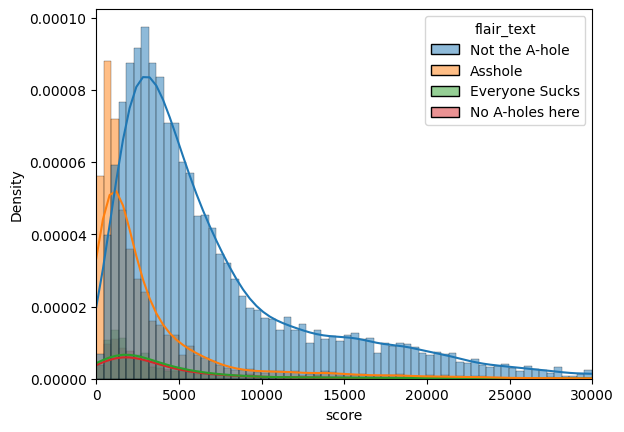

In [25]:
# Obtain the top 4 most common flairs
top_flairs = df['flair_text'].value_counts().head(4).index

# Subset the dataframe by these flairs
df_top_flairs = df[df['flair_text'].isin(top_flairs)]

# Use seaborn to plot a histogram
sns.histplot(
    data=df_top_flairs,
    x='score',
    hue='flair_text',
    alpha=0.5,
    stat='density',
    kde=True)

# Adjust the x-axis limits
plt.xlim([0, 30000])

# 🎉 Well Done!

This workshop series took us through the basics of data analysis in Python:

- Using Jupyter notebooks.
- Variables, data types, functions.
- Looking through documentation.
- Googling errors and debugging.
- Manipulating data with Pandas.

<div class="alert alert-success">

## ❗ Key Points

* Import a library into Python using `import <libraryname>`.
* Data frames allow you to work with tabular data (think Excel in Python).
* A .csv file is just a text file that contains data separated by commas.
* Use the `pandas` library to work with data frames.
* Data frames are typically assigned as `df`.
* `DataFrame` columns can be indexed using square brackets - e.g. `df[last_name]` indexes a column called "last_name" in `df`.
* Use the `.describe()` method on a `DataFrame` to get basic summary statistics.
    
</div>